# Unsupervised machine learning

There is no known output. The algorithm is just shown the data and asked to extract knowledge from it

* Transformations: Create new representations of the data that is easier for humans or other ML algorithms to understand.

* Clustering: Partition data into distinct groups of similar items.

As unsupervised algorithms can be quite unpredictable, they are often used in exploratory settings, when the scientist wants to know the data better, rather than as part of a larger automatic system.

Index:
* Preprocessing and scaling
    * Different kinds of preprocessing
    * Applying data transformations
    * Scaling training and test data the same way
    * The Effect of Preprocessing on Supervised Learning
* Dimensionality reduction, Feature extraction, and Manifold Learning
    * Principal Component Analysis (PCA)
    * Non-negative matrix factorization (NMF)
    * t-SNE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

C:\Users\luisc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Preprocessing and scaling

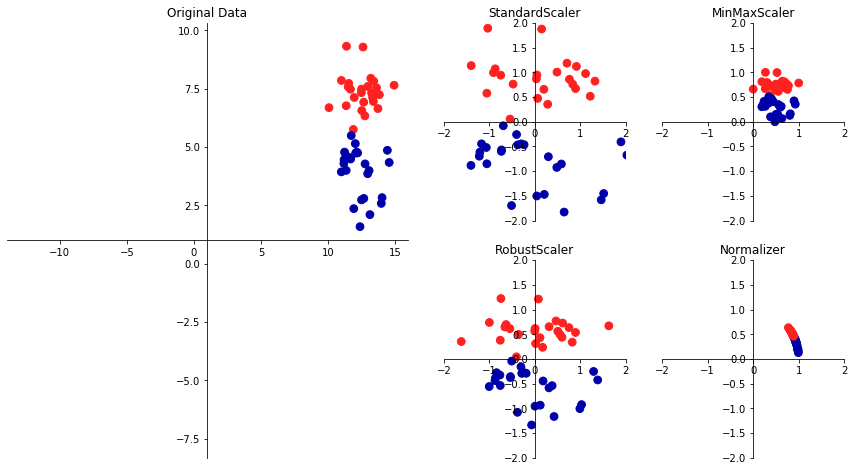

In [2]:
mglearn.plots.plot_scaling()

## Different kinds of preprocessing

The ones shown in the previous graphs:

* StandardScaler: ensures that for each feature the the mean is 0 and variance is 1, bringing all features to the same magnitude. However, it doesn't ensure any particular minimum or maximum for the features.
* RobustScaler: Similar to the StandardScaler, but it uses median and quartiles instead. This scaler ignores outliers.
* MinMaxScaler: Shifts the data so that everything is between 0 and 1
* Normalizer: It projects each datapoint on a circle with a radius of one. If there are more dimensions then on a sphere or hyper-sphere and crazy stuff. This means that every data point is scaled by a different number.

## Applying data transformations

Let's apply scaling on the breast cancer dataset

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state = 1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


Now we import the class that does the preprocessing and instantiate it:

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

To apply the transformation whe use the transform method of the scaler.

In [5]:
# Transform the data
X_train_scaled = scaler.transform(X_train)

#Print dataset properties before and after scaling
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


The transformed data has the same shape as the original one, it is just scaled.

We also need to transform the test set.

In [6]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In the case of the test set the numbers are outside of the range of 0 to 1. This is because the scalers always apply the exact same transformation from the training set to the test set.

It always substracts the training set minimum and divides by the training set range, which might be different from the minimum and range from the test set.

## Scaling Training and Test Data the same way

It is important to apply exactly the same transformation to the training and test sets for the algorithms to work correctly.

If we scale them differently trouble arises, like in the following example.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

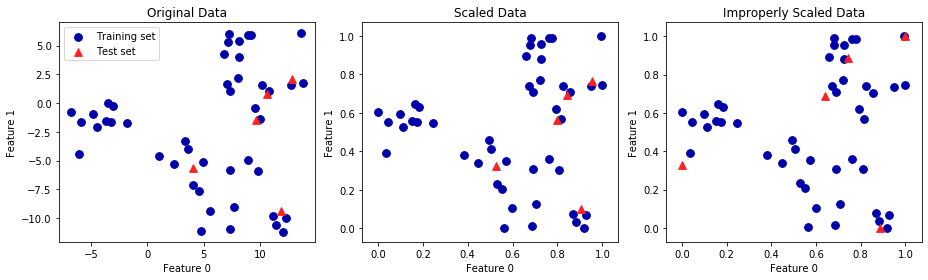

In [7]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

#-------------------------------------------------------------------------------
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
#-------------------------------------------------------------------------------
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

It can be seen that the improperly scaled data doesn't have the same shape as the original data.

### NOTE:

Instead of doing .fit on the scaler and then using .transform to scale my training set, I can use .fit_transform to do it more efficiently.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Calling fit and transform in sequence (method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# Same result, but more efficient computation
X_scaled = scaler.fit_transform(X_train)

## The Effect of Preprocessing on Supervised 

We'll first fit a model to the original cancer dataset, and then repeat the operation but on a scaled dataset

In [9]:
# Data without scaling
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


C:\Users\luisc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
# The trained model after scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# Scoring on the scaled test set
print("Scaled tst set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled tst set accuracy: 0.97


C:\Users\luisc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Scaling the data can improve performance quite drastically.

Changing the scaler is pretty easy as all of them use the same interface.

In [11]:
# Preprocessing using zero man and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Learning on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# Dimensionality reduction, feature extraction, and manifold learning

The most common motivations for transforming data with unsupervised learning are visualization, compressing the data, and finding a representation that is more informative for further processing.

Three common algorithms:
* Principal Component Analysis (PCA)
* Non-negative matrix factorization (NMF): feature extraction
* t-SNE: commonly used for visualization in scatter plots

## Principal Component Analysis (PCA)

Rotates the dataset in a way that the rotated features are statistically uncorrelated.

This rotation is followed by selecting some of the new features, according to how important they are for explaining the data.

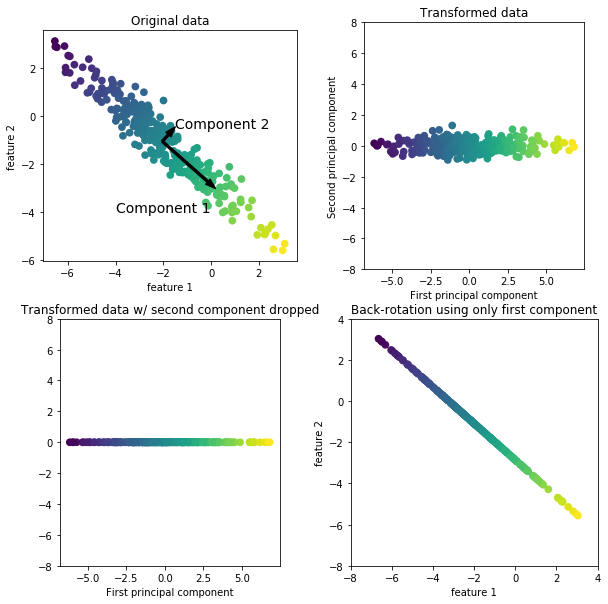

In [12]:
mglearn.plots.plot_pca_illustration()

##### First plot:
The first plot shows the original data points.

The algorithm first detects the direction in which the features are more correlated with each other (Component 1).
Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle)to the first direction (Component 2).

These two directions are called PRINCIPAL COMPONENTS, ast hey are the main directions of variance in the data.

In general, there are as many principal components as original features.

##### Second plot:
Data is rotated so that the first principal component aligns with the x-axis and the second principal component to the y axis.

Before the rotation the mean was substracted to so the transformed data is centered around zero.

In the rotated form the two axes are uncorrelated.

##### Third and fourth plots
We then use PCA for dimensionality reduction by retaining only some of the principal components. In this case we are reducing the data into only 1 dimension, keeping only the first principal component.

In the last plot, we rotate the data again, returning it ot its original space and adding the mean to it.

Now we only have the information contained in the first principal component. This is often used to remove noise effects or visualize what part of the info is retained using the principal components.

### Applying PCA to the cancer dataset for visualization

One of the most common applications of PCA is to visualize high dimensional data.

One way to visualize it is to plot a histogram of each feature and for each of the classes and see how the feature magnitudes behave in each class.

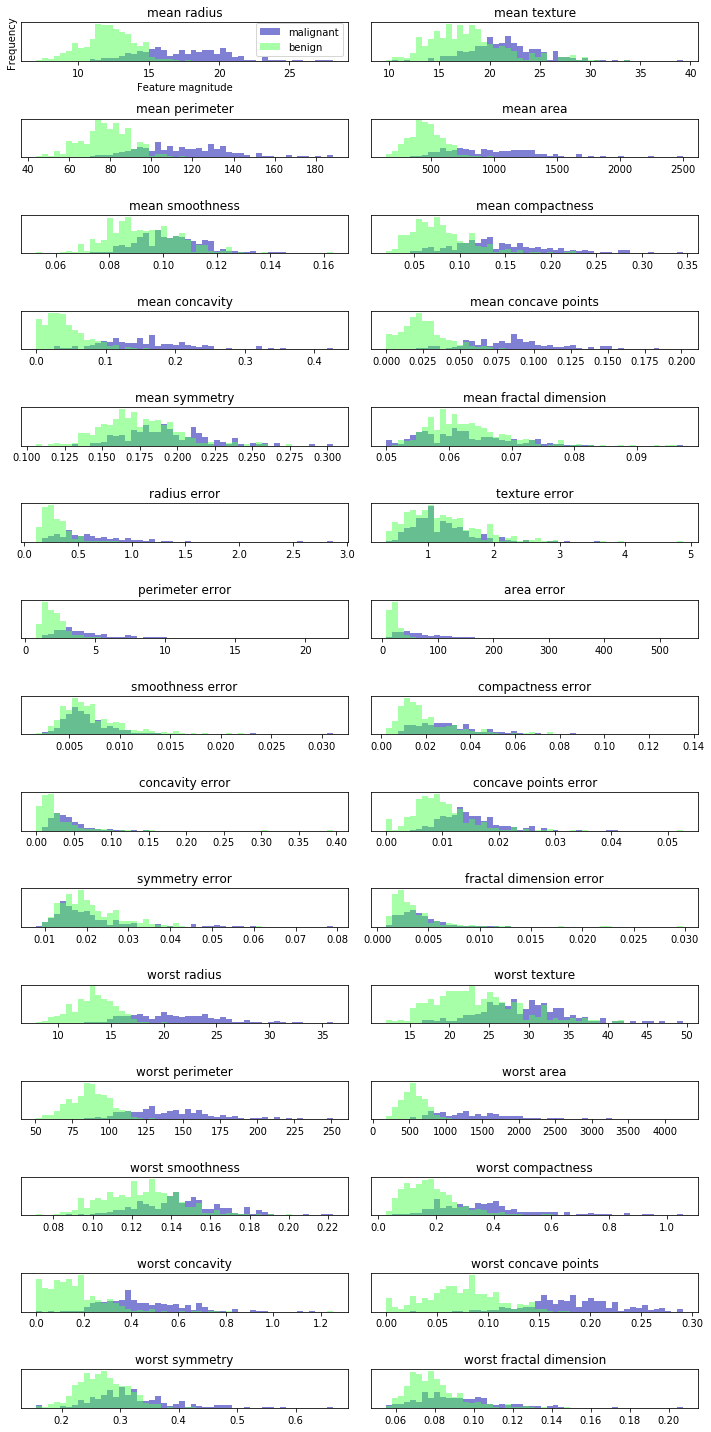

In [13]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

While the plots may tell us some information, it doesn't give us anything on the interaction between variables.

Using PCA, we can capture the main interactions and get a slightly better picture.

We can find the first two principal components and visualize the data in a 2D dataplot.

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

scaler = StandardScaler()

scaler.fit(cancer['data'])

X_scaled = scaler.transform(cancer['data'])

PCA works like the scalers, in thatfirst you instantiate the class, you fit it and then use transform.

You need to specify to the algorithm how many components we want to keep.

In [15]:
from sklearn.decomposition import PCA
#Keep first two principal components of the data
pca = PCA(n_components = 2)
# Fit PCA model to breast cancer data
pca.fit(X_scaled)

# Transform data onto the first two principal components
X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(X_scaled.shape))
print("Reduced shape: {}".format(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


The dataset wass reduced from 30 dimensions to just two dimensions.

Now we can plot it.

It is important to note that PCA is an unsupervised method, and therefore doesn't use any information on the data to rotate it, just the correlations in it.

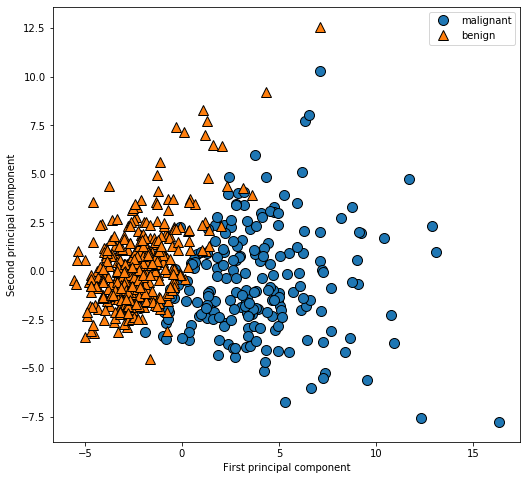

In [16]:
# Plot first vs. second principal component, colored by class
plt.figure(figsize = (14,8))

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer['target'])
plt.legend(cancer['target_names'], loc='best')

plt.gca().set_aspect("equal")
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.show()

PCA can be difficult to interpret as the principal components corresponds to directions in the original data, so they are combinations of the original features.

The principal components are stored in the components_ attribute of the PCA object.

In [17]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Each row in the components_ correspond to one principal component and are sorted by their importance. The columns correspond to each one of the original features.

We can then visualize it with a heatmap so it is easier to understand.

In [20]:
print('PCA components:\n{}'.format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


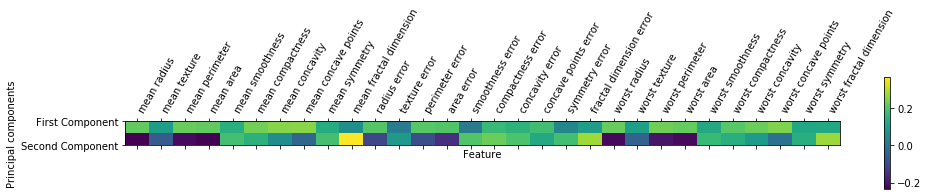

In [19]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['First Component', 'Second Component'])
plt.colorbar()
plt.xticks(range(len(cancer['feature_names'])), cancer['feature_names'], rotation = 60, ha = 'left')
plt.xlabel('Feature')
plt.ylabel('Principal components')
plt.show()

All the features in the first component are positive. This means that there is a general correlation between all the features. As one feature goes up, the others will probably do so.

The second component has mixed signs.

Both components involve all 30 features.

This mixing of features is what makes PCA difficult to explain.

### Eigenfaces for feature extraction

It is possible to find a representation of your data that is better suited to analysis than the raw representation.

A good example of this application is with images. The pixels in images are only meaningful when they are together.

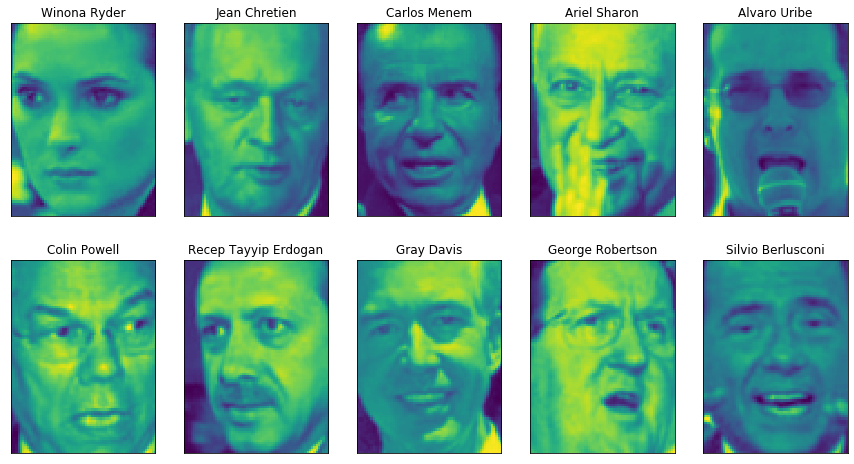

In [22]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize = (15,8), subplot_kw = {'xticks':(), 'yticks':()})

for target, image, ax in zip(people['target'], people['images'], axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

There are 3,023 images, each 87X65 pizels, belonging to 62 different people

In [23]:
print('people.images.shape: {}'.format(people.images.shape))
print('Number of classes: {}'.format(len(people['target_names'])))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [24]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

The dataset is skewed as there are a lot of George Bushes.

Toe make it less skewed we will admit up to 50 images of the same person. Otherwise the feature extraction would be overwhelmed by the likelihod of George Bush.

In [25]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

A common task is to identify new faces based on the existing database.

However, there are usually many different faces in databases and very few examples of every person.

A simple solution could be to use the KNeihborsClassifier, which could work with only one example in the training set in theory.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


The score is not that bad for a 62-class classification task, but it is not good.

This is where PCA comes in handy. KNN will compare every pixel with another pixel in the same position in another image and take a decision. This means that moving a face one pixel to the right will make a drastic change.

PCA has the whitening option that rescales the principal components to have the same scale. 

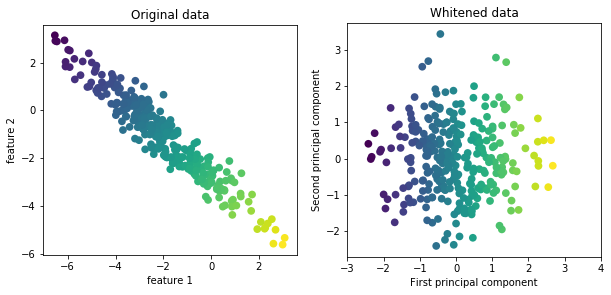

In [28]:
mglearn.plots.plot_pca_whitening()

We now fit the PCA object to the training data and extract the 100 first principal components.

The new data has 100 features, the first 100 principal components.

In [29]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


Now we can use the new representation to classify our images with the KNN.

In [30]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [31]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


Accuracy improved quite a lot after using the principal components for analysis.

For image data we can visualize the princippal components, which will be images of the same size as the ones in the dataset.

These components might be hard to interpret. For example, the first one could contrast the difference in lighting from the background and the face.

It is important to remember that computers will interpret images way different than humans.

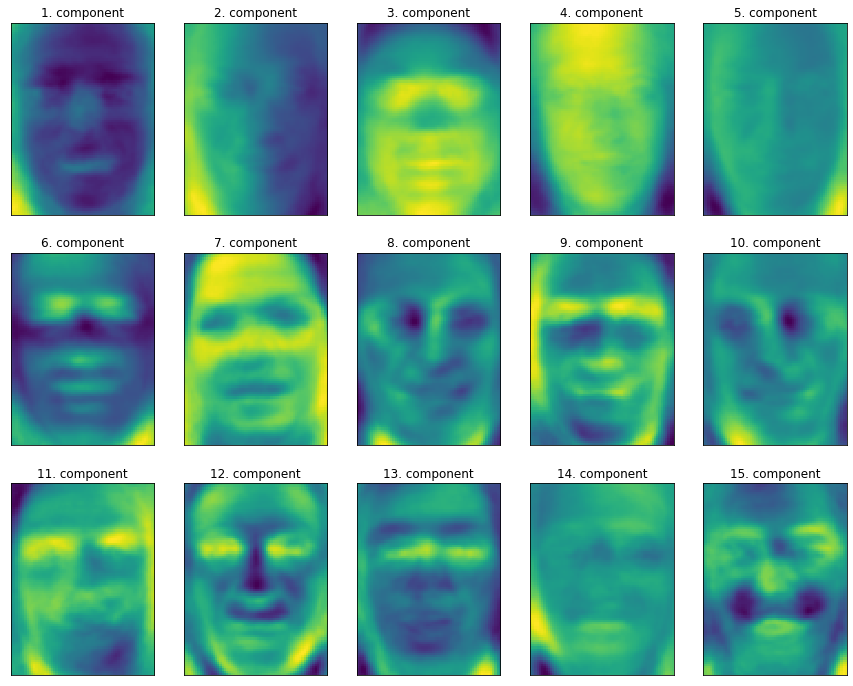

In [32]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

The PCA model is based on pizels, so the position of the face, and lighting will have an effect on how PCA interprets the image.

We can return the components to the original feature space by using the inverse_transform function. In this case, we can reconstruct the faces by using the function and using different numbers of principal components.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 2.4s, 0.0min


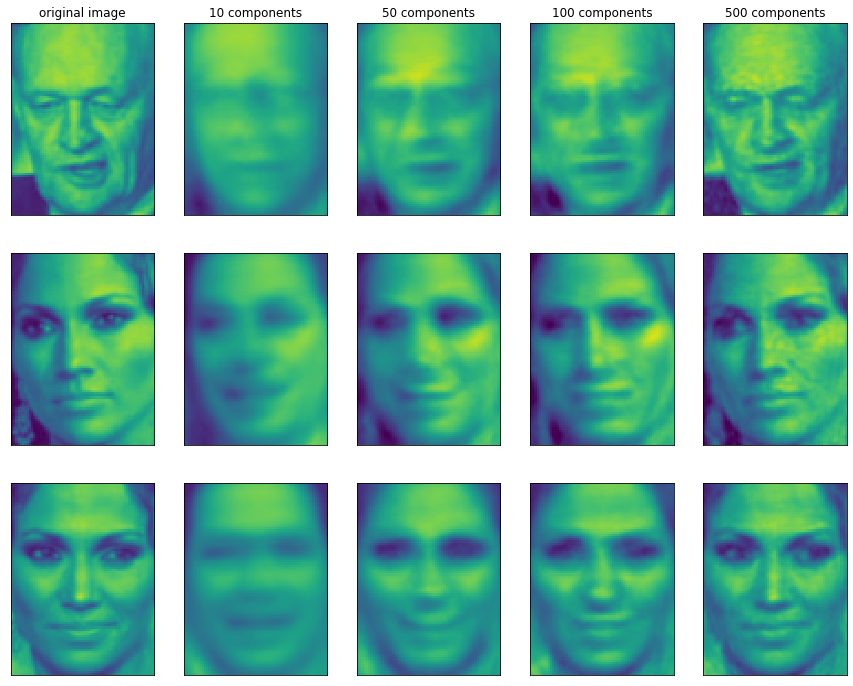

In [33]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

We can also try to use PCA to visualize all the faces in the dataset in a scatterplot, showing the first two principal components with the classes given by who is shown in the images.

In this case it is just a blob, as PCA, even with 10 principal components as shown in the previous pictures, can only capture some of the face features.

Text(0, 0.5, 'Second principal component')

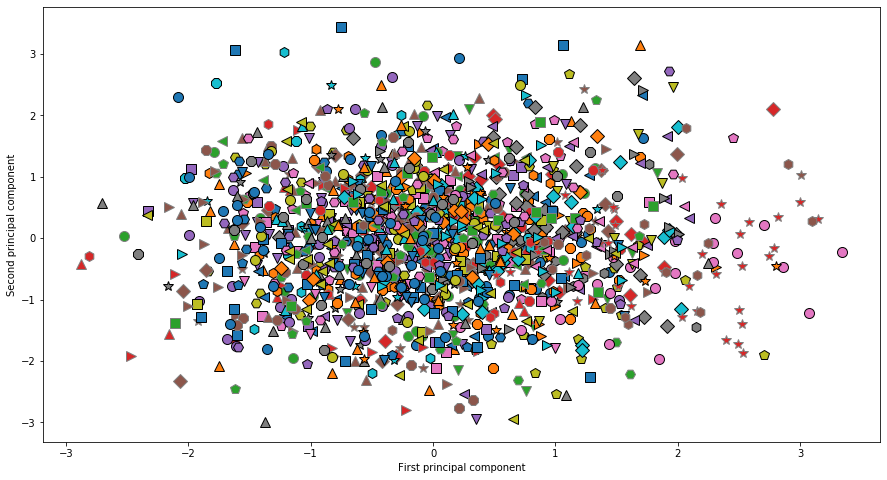

In [35]:
plt.figure(figsize = (15,8))
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## Non-Negative Matrix Factorization (NMF)